In [6]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
from matplotlib.colors import Normalize 
import glob
import os

<function matplotlib.pyplot.show(close=None, block=None)>

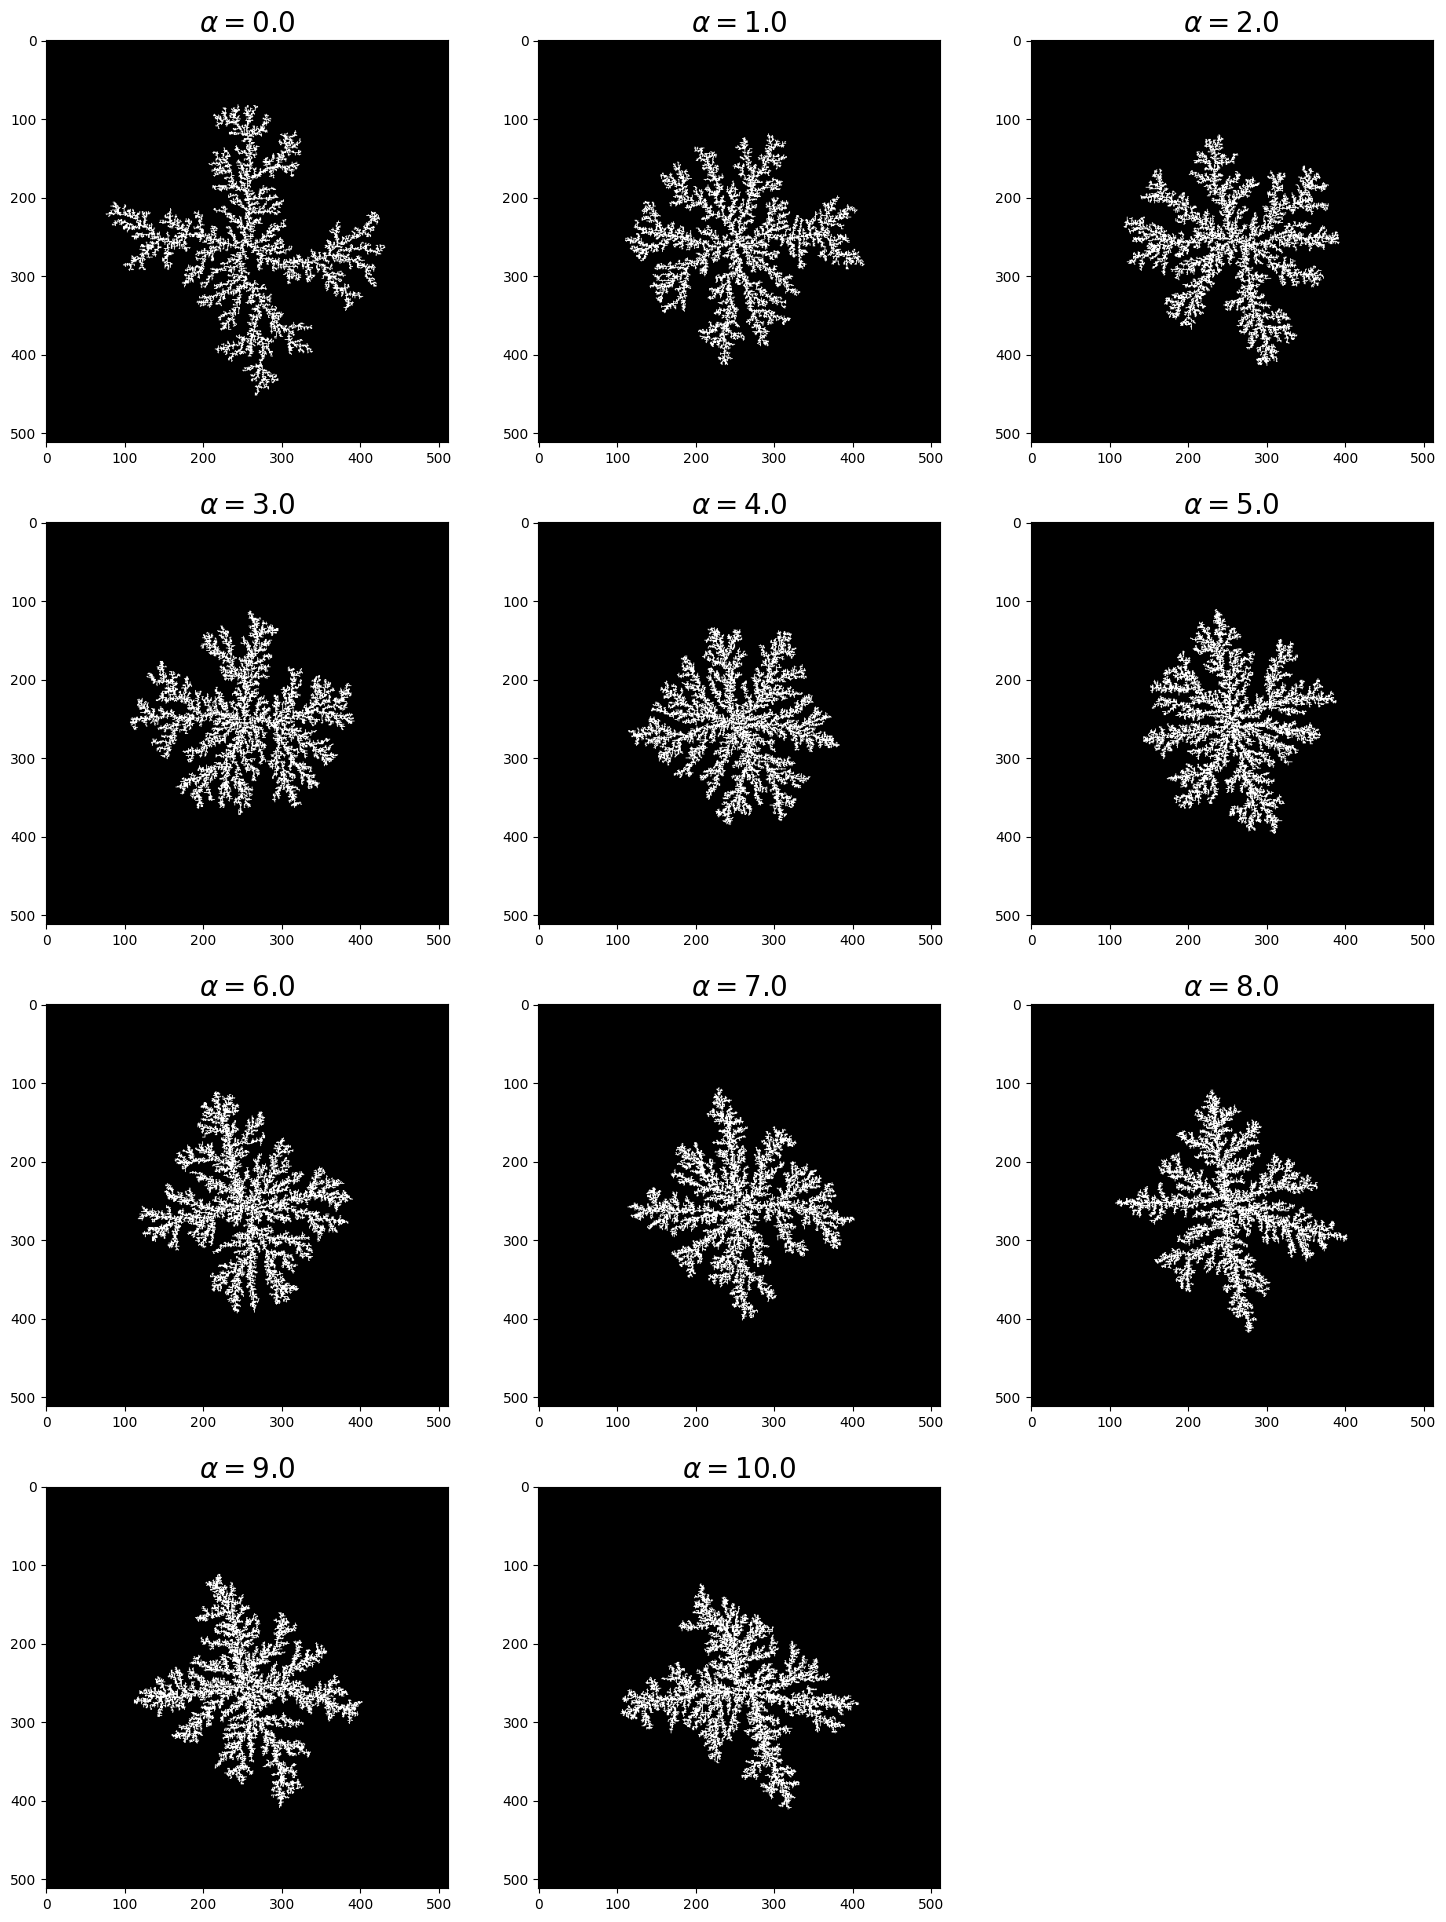

In [9]:
import re  #正規表現を行う

def atoi(text):
    return int(text) if text.isdigit() else text  #isdigit関数は引数のデータ型を返す。数値ならtrue,文字ならfalse,Pythonのif文ってこんな書き方でもokなんだねえ。

def natural_keys(text):
    return [ atoi(c) for c in re.split(r'(\d+)', text) ]  #正規化の基準を数字に設定？

#フォルダ名取得&並べ替え(alpha小さい順)
const=1/16
DLA_list = glob.glob('data/C='+str(const)+'*/DLA_data/DLA_alpha=*.dat')
DLA_list.sort(reverse=False,key=natural_keys)

#リスト定義
DLA=[[] for i in range(len(DLA_list))]

#データ読み込み
for i in range(0,len(DLA_list)):
    str_DLA=DLA_list[i] #string　of file name
    alpha=float(str_DLA[35:-4]) #return alpha
    tmp=np.loadtxt(DLA_list[i])
    DLA[i]=[alpha,tmp]

column=3
row=int((len(DLA_list)-len(DLA_list)%column)/column+1 )

fig=plt.figure(figsize=(6*column,6*row))

for i in range(0,len(DLA_list)): #全出力
    ax=fig.add_subplot(row,column,i+1)
    plt.title(r"$\alpha=$"+str(DLA[i][0]),fontsize=20)
    plt.imshow(DLA[i][1], cmap="gray")
plt.show

# fig=plt.figure(figsize=(18,6))

# i=0
# j=1
# ax=fig.add_subplot(1,3,j)
# plt.title(r"$\alpha=$"+str(DLA[i][0]),fontsize=20)
# plt.imshow(DLA[i][1], cmap="gray")

# i=5
# j=2
# ax=fig.add_subplot(1,3,j)
# plt.title(r"$\alpha=$"+str(DLA[i][0]),fontsize=20)
# plt.imshow(DLA[i][1], cmap="gray")

# i=11
# j=3
# ax=fig.add_subplot(1,3,j)
# plt.title(r"$\alpha=$"+str(DLA[i][0]),fontsize=20)
# plt.imshow(DLA[i][1], cmap="gray")

# plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

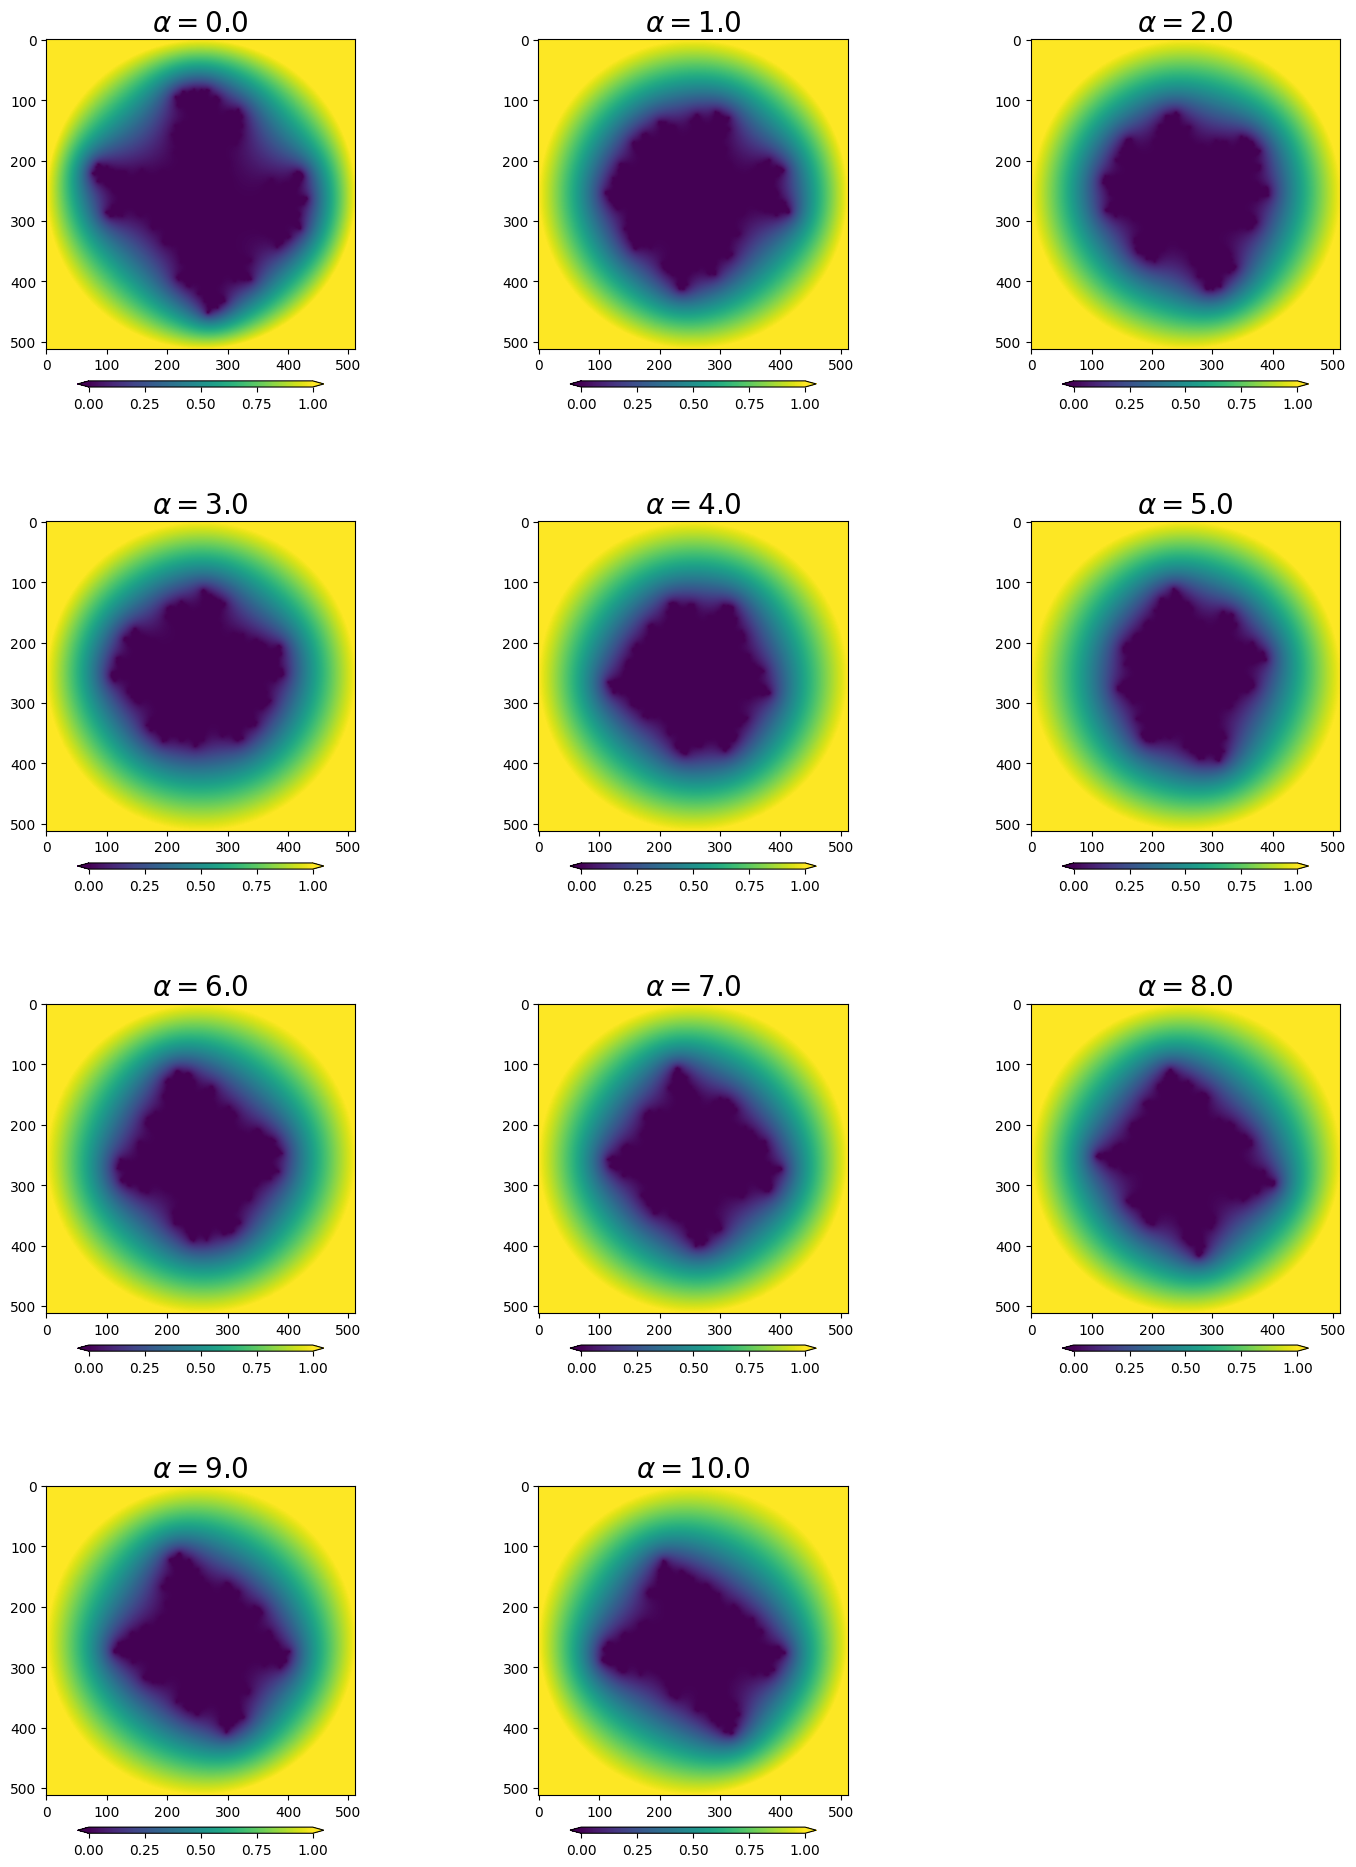

In [10]:
import re  #正規表現を行う

def atoi(text):
    return int(text) if text.isdigit() else text  #isdigit関数は引数のデータ型を返す。数値ならtrue,文字ならfalse,Pythonのif文ってこんな書き方でもokなんだねえ。

def natural_keys(text):
    return [ atoi(c) for c in re.split(r'(\d+)', text) ]  #正規化の基準を数字に設定？

#フォルダ名取得&並べ替え(alpha小さい順)
const=1/16
Phi_list = glob.glob('data/C='+str(const)+'*/Phi_data/Phi_alpha=*.dat')
Phi_list.sort(reverse=False,key=natural_keys)

#リスト定義
Phi=[[] for i in range(len(Phi_list))]

#データ読み込み
for i in range(0,len(Phi_list)):
    str_Phi=Phi_list[i] #string　of file name
    alpha=float(str_Phi[35:-4]) #alpha
    tmp=np.loadtxt(Phi_list[i])
    Phi[i]=[alpha,tmp]

column=3
row=int((len(DLA_list)-len(DLA_list)%column)/column+1 )
N=512 #メッシュ分割数

fig=plt.figure(figsize=(6*column,6*row))
for i in range(0,len(Phi_list)):
    Phi_value=Phi[i][1][:,2].reshape([N,N])
    ax=fig.add_subplot(row,column,i+1)
    plt.title(r"$\alpha=$"+str(Phi[i][0]),fontsize=20)
    plt.imshow(Phi_value)
    plt.colorbar(aspect=40, pad=0.08, shrink=0.6,orientation='horizontal', extend='both')  

plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

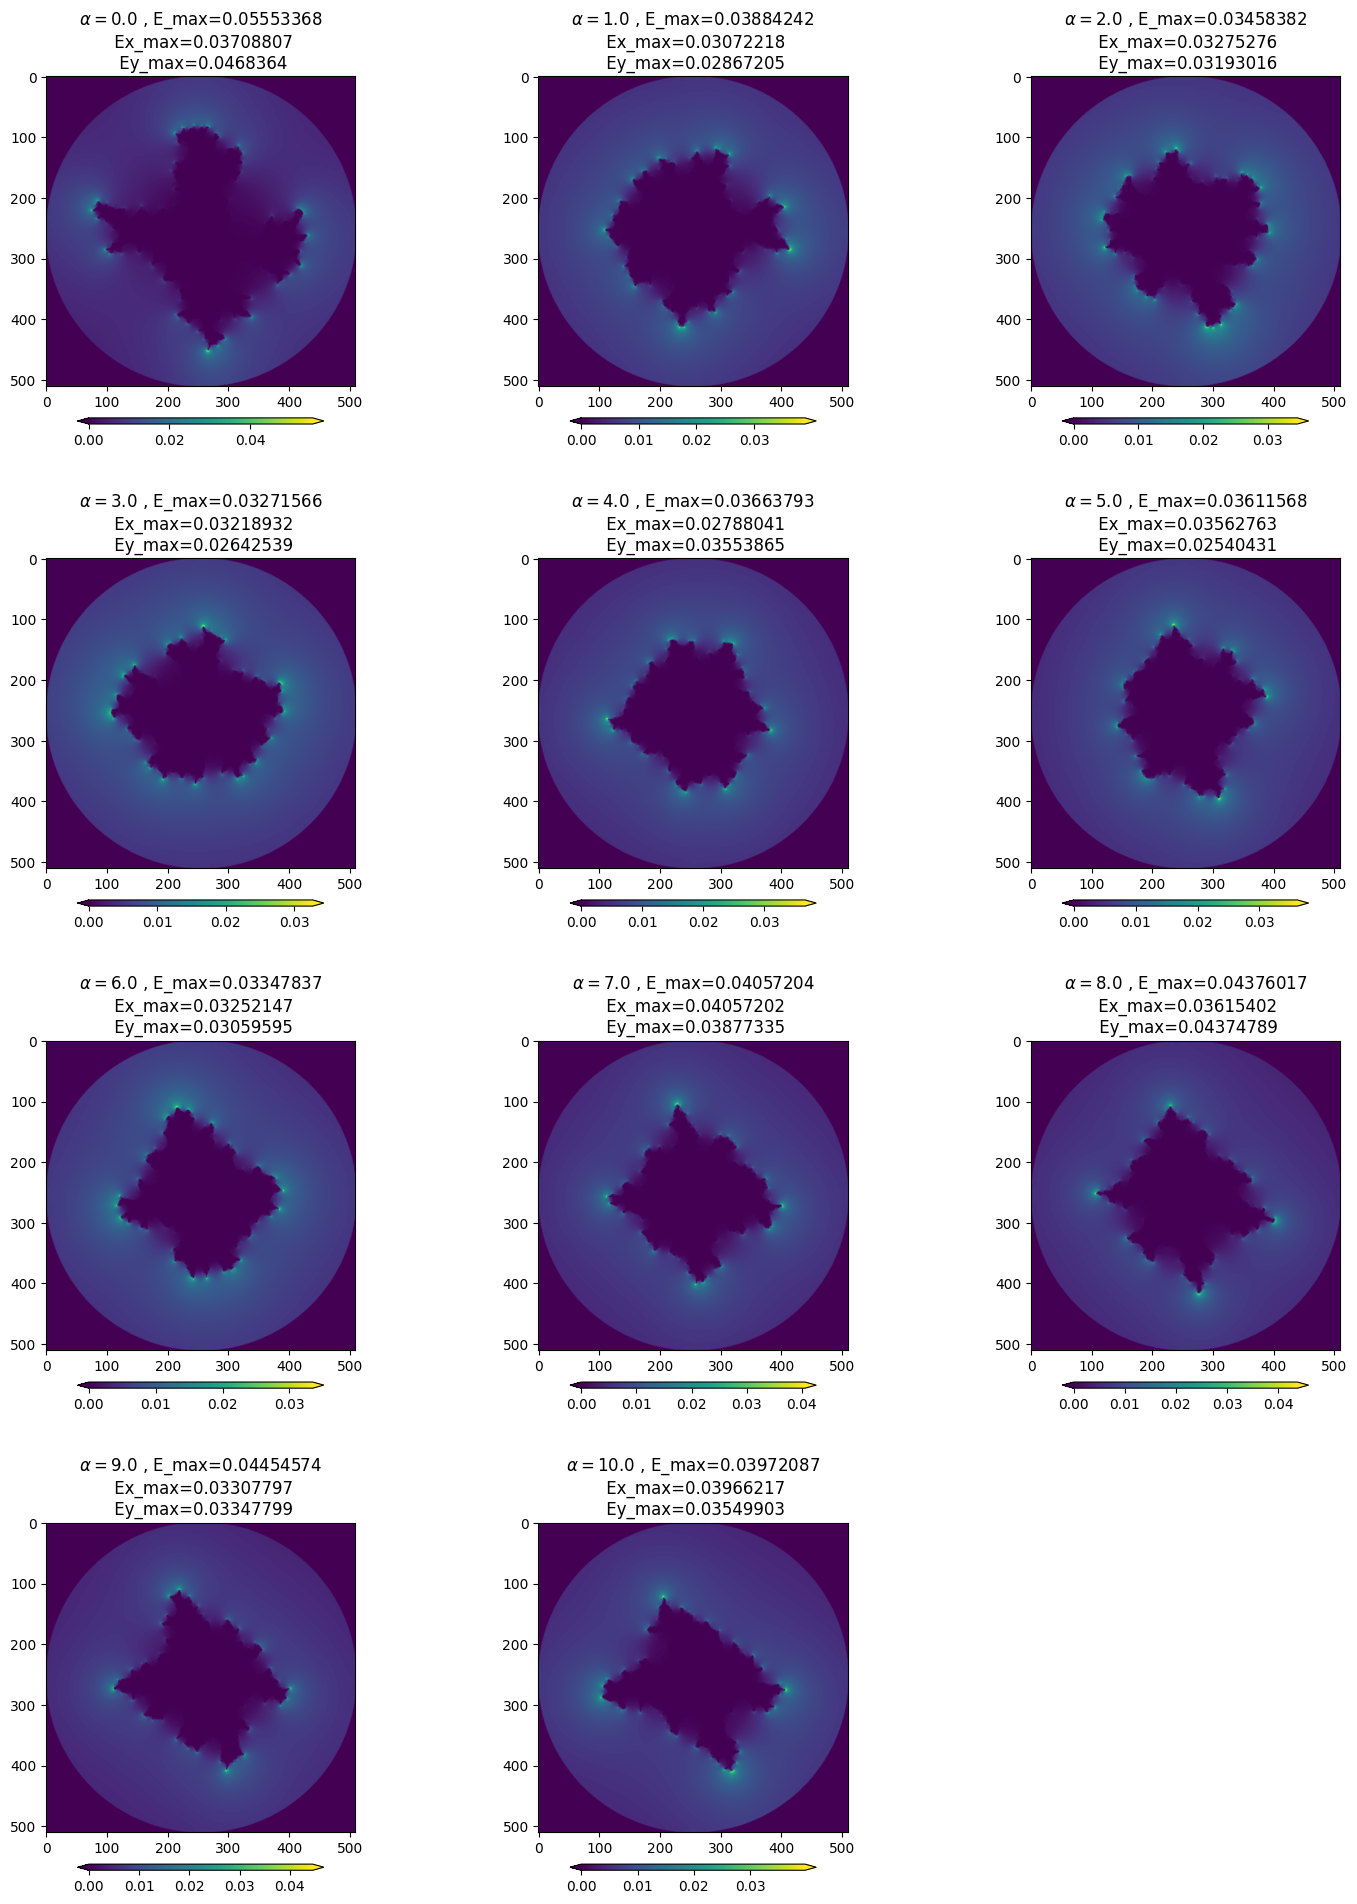

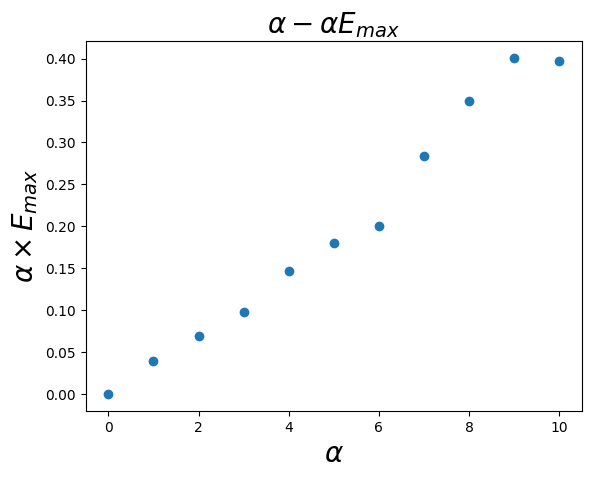

In [11]:
import re  #正規表現を行う

def atoi(text):
    return int(text) if text.isdigit() else text  #isdigit関数は引数のデータ型を返す。数値ならtrue,文字ならfalse,Pythonのif文ってこんな書き方でもokなんだねえ。

def natural_keys(text):
    return [ atoi(c) for c in re.split(r'(\d+)', text) ]  #正規化の基準を数字に設定？

#フォルダ名取得&並べ替え(alpha小さい順)
const=1/16
El_list = glob.glob('data/C='+str(const)+'*/El_data/El_alpha=*.dat')
El_list.sort(reverse=False,key=natural_keys)

#リスト定義
El=[[] for i in range(len(El_list))]

#データ読み込み
for i in range(0,len(El_list)):
    str_El=El_list[i] #string　of file name
    alpha=float(str_El[33:-4]) #alpha
    tmp=np.loadtxt(El_list[i])
    El[i]=[alpha,tmp]

column=3
row=int((len(DLA_list)-len(DLA_list)%column)/column+1 )
N=512 #メッシュ分割数

fig=plt.figure(figsize=(6*column,6*row))

for i in range(0,len(El_list)):
    El_value=El[i][1][:,2].reshape([N-2,N-2])
    Ex_max=max(El[i][1][:,3])
    Ey_max=max(El[i][1][:,4])
    E_max=max(El[i][1][:,2])

    ax=fig.add_subplot(row,column,i+1)
    plt.title(r"$\alpha=$"+str(El[i][0])+" , E_max="+str(E_max)+"\n Ex_max="+str(Ex_max)+"\n Ey_max="+str(Ey_max))
    plt.imshow(El_value)
    plt.colorbar(aspect=40, pad=0.08, shrink=0.6,orientation='horizontal', extend='both')  

plt.show

x=[[] for i in range(len(El_list))]
y=[[] for i in range(len(El_list))]

for i in range(0,len(El)):
    x[i]=El[i][0]
    y[i]=El[i][0]*max(El[i][1][:,2])

fig,ax=plt.subplots()
ax.scatter(x,y)
ax.set_xlabel(r"$\alpha$",fontsize=20)
ax.set_ylabel(r"$\alpha\times E_{max}$",fontsize=20)
plt.title(r"$\alpha-\alpha E_{max}$",fontsize=20)

plt.show

[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0] [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0]


<function matplotlib.pyplot.show(close=None, block=None)>

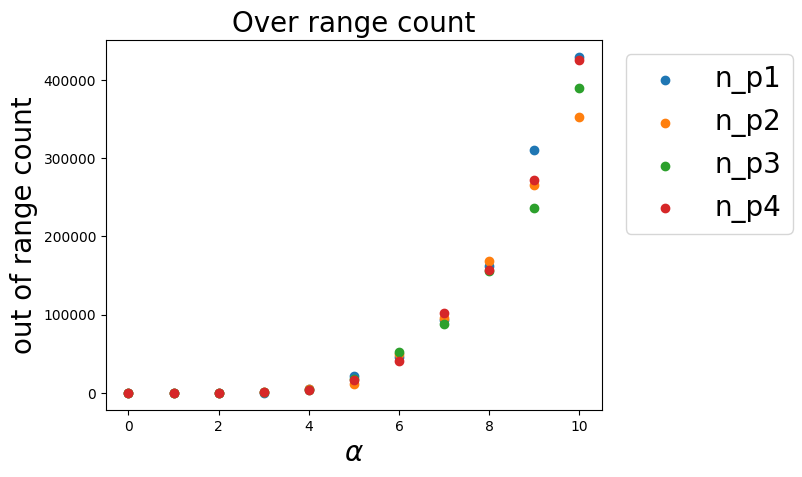

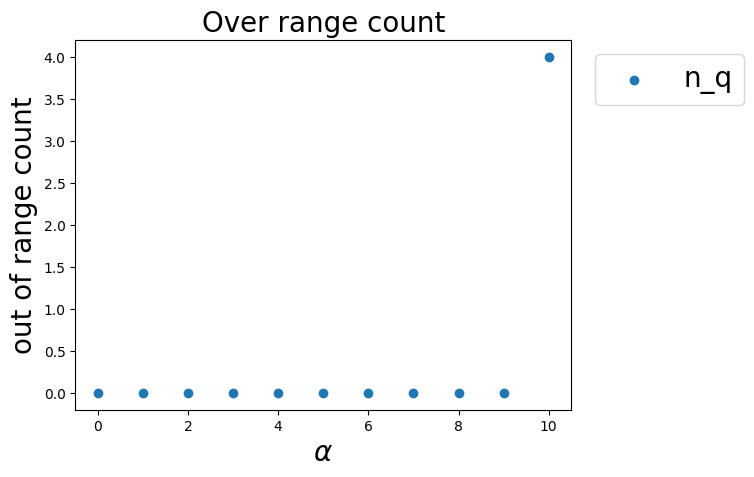

In [12]:
import re  #正規表現を行う

def atoi(text):
    return int(text) if text.isdigit() else text  #isdigit関数は引数のデータ型を返す。数値ならtrue,文字ならfalse,Pythonのif文ってこんな書き方でもokなんだねえ。

def natural_keys(text):
    return [ atoi(c) for c in re.split(r'(\d+)', text) ]  #正規化の基準を数字に設定？

#フォルダ名取得&並べ替え(alpha小さい順)
const=1/16
other_list = glob.glob('data/C='+str(const)+'*/other_data/other_alpha=*.dat')
other_list.sort(reverse=False,key=natural_keys)

#リスト定義
other=[[] for i in range(len(other_list))]

#データ読み込み
for i in range(0,len(other_list)):
    str_other=other_list[i] #string　of file name
    alpha=float(str_other[39:-4]) #alpha
    tmp=np.loadtxt(other_list[i])
    other[i]=[alpha,tmp]
    

#変数設定
x=[[] for i in range(len(other_list))]
y=[[[]for j in range (len(other))] for i in range(len(other[0][1]))]
label=[[]for i in range (len(other[0][1]))]

for j in range(0,len(other[0][1])):
    for i in range(0,len(other)): 
        x[i]=other[i][0]
        y[j][i]=other[i][1][j]

label=[r"$alpha$","n_p1","n_p2","n_p3","n_p4","n_q"]

print(x,y[5])

fig,ax=plt.subplots()
for i in range(1,len(other[0][1])-1):
    ax.scatter(x,y[i],label=label[i])

ax.set_xlabel(r"$\alpha$",fontsize=20)
ax.set_ylabel(r"out of range count",fontsize=20)
plt.title("Over range count",fontsize=20)
ax.legend(loc="upper left", bbox_to_anchor=(1.02, 1.0,),fontsize=20)

fig,ax=plt.subplots()
ax.scatter(x,y[5],label=label[5])

ax.set_xlabel(r"$\alpha$",fontsize=20)
ax.set_ylabel(r"out of range count",fontsize=20)
plt.title("Over range count",fontsize=20)
ax.legend(loc="upper left", bbox_to_anchor=(1.02, 1.0,),fontsize=20)


plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

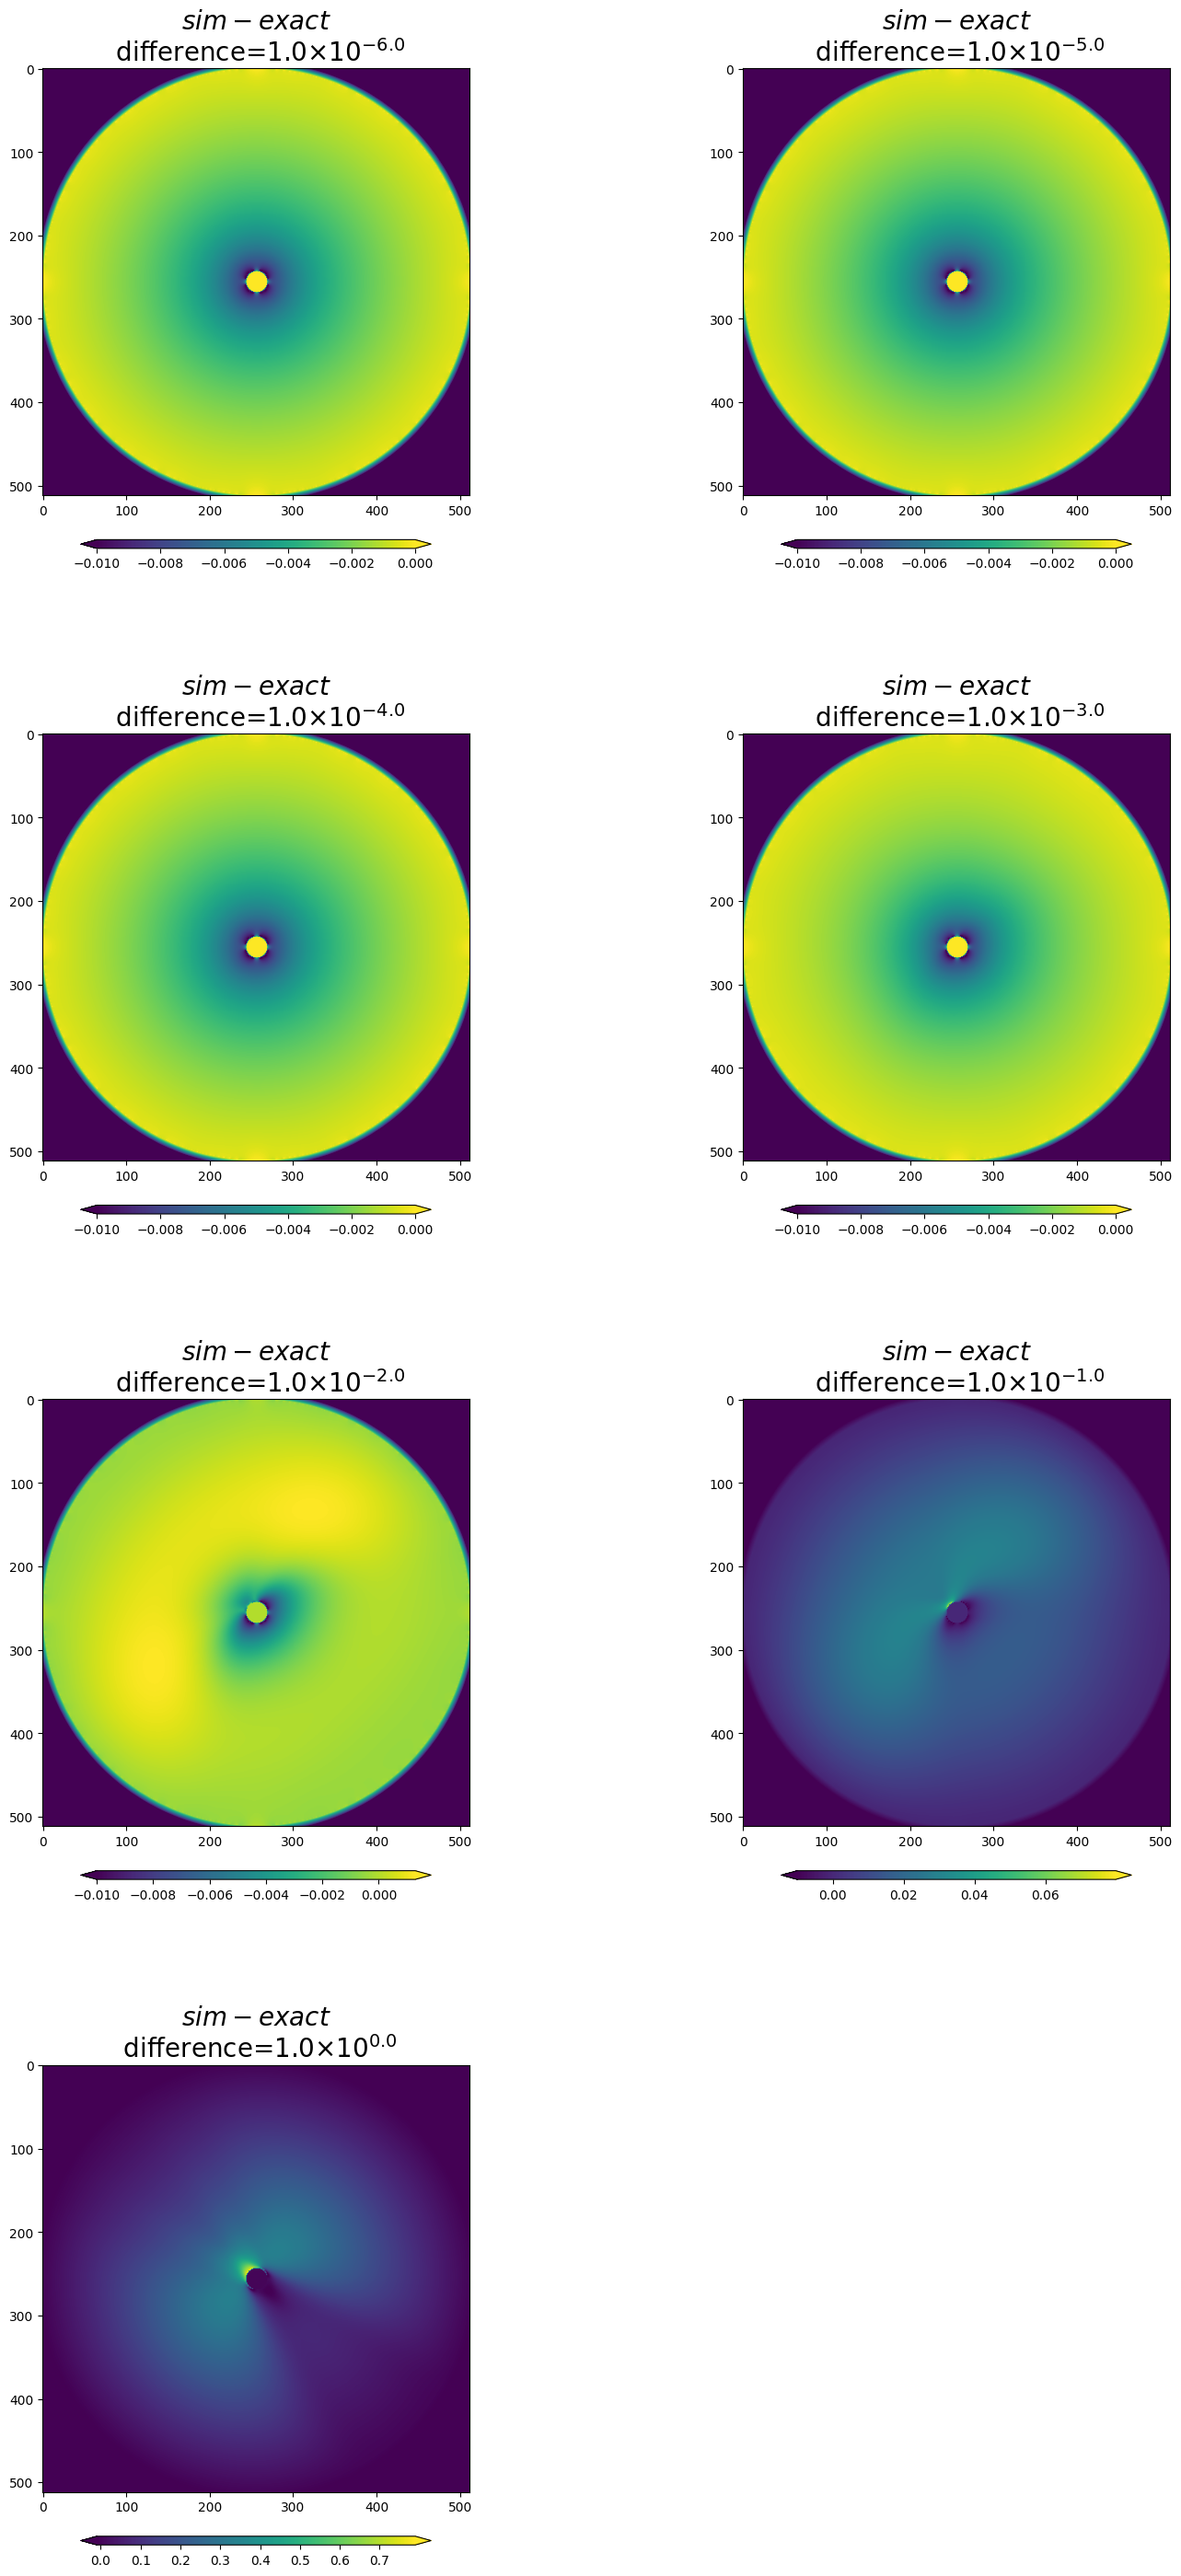

In [13]:
import re  #正規表現を行う

def atoi(text):
    return int(text) if text.isdigit() else text  #isdigit関数は引数のデータ型を返す。数値ならtrue,文字ならfalse,Pythonのif文ってこんな書き方でもokなんだねえ。

def natural_keys(text):
    return [ atoi(c) for c in re.split(r'(\d+)', text) ]  #正規化の基準を数字に設定？

#フォルダ名取得&並べ替え(dif小さい順)
err_list = glob.glob('test/errtest/threshold/threshold_dif=*.dat')
err_list.sort(reverse=False,key=natural_keys)

#リスト定義
err=[[] for i in range(len(err_list))]
  
#データ読み込み
for i in range(0,len(err_list)):
    str_err=err_list[i] #string　of file name
    dif=float(str_err[37:-4]) #threshold difference
    tmp=np.loadtxt(err_list[i])
    err[i]=[dif,tmp]
    
column=2
row=int((len(err_list)-len(err_list)%column)/column+1 )

fig=plt.figure(figsize=(9*column,9*row))
for i in range(0,len(err_list)): #全出力
    ax=fig.add_subplot(row,column,i+1)
    index=np.log10(err[i][0])
    plt.title(r"$sim-exact$" "\n difference=1.0" r"$\times 10^{"+str(index)+"}$",fontsize=20)
    plt.imshow(err[i][1],vmin=-0.01)
    plt.colorbar(aspect=40, pad=0.08, shrink=0.6,orientation='horizontal', extend='both') 

plt.show

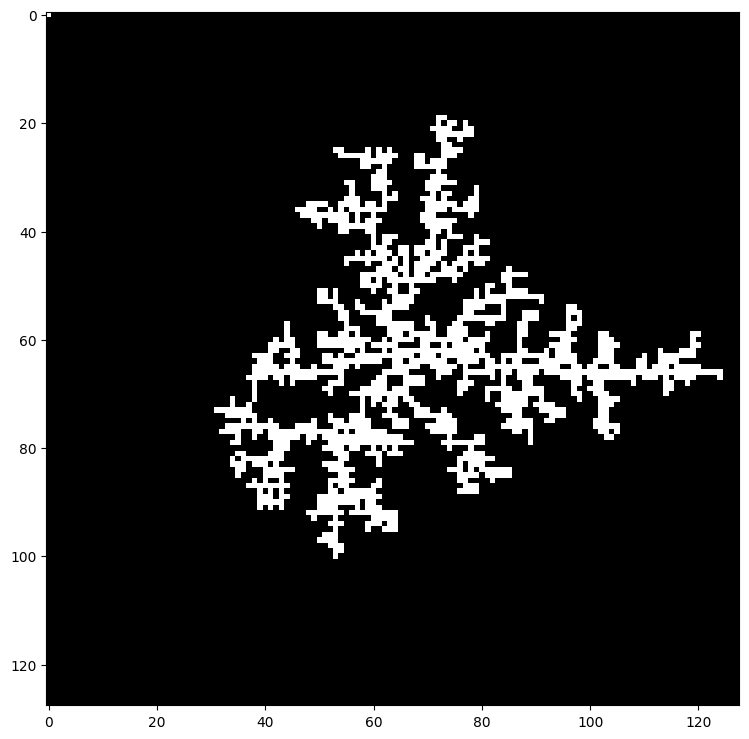

In [17]:
test=np.loadtxt('test/test_DLA.dat')
fig = plt.figure(figsize=(9, 9))
plt.imshow(test,cmap="gray")
           

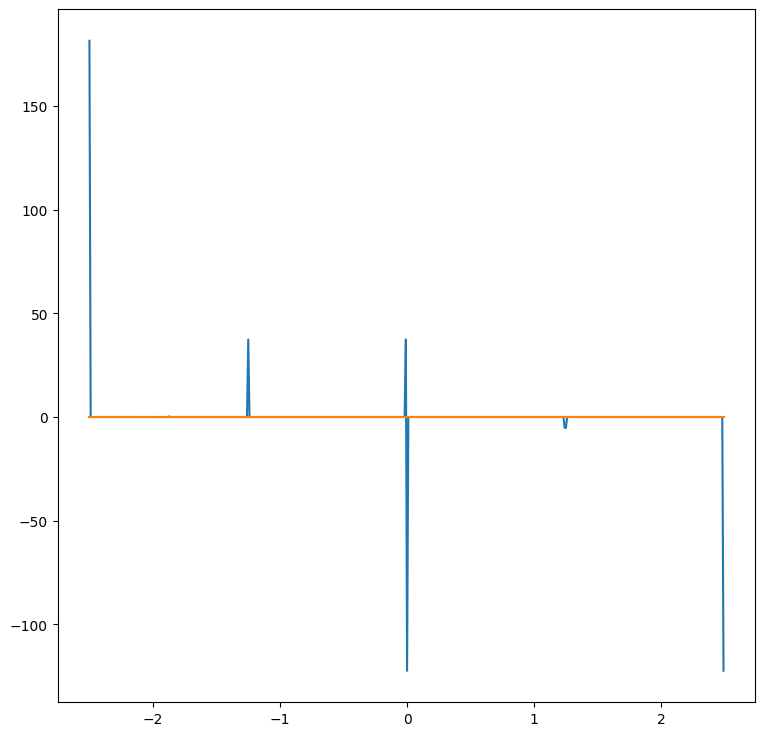

In [39]:
test=np.loadtxt('test/FFT_test.dat')
fig = plt.figure(figsize=(9, 9))
x=[[] for i in range(len(test))]
k=[[] for i in range(len(test))]
y=[[] for i in range(len(test))]

n=512
delta=5.0/n

for i in range (len(test)):
    x[i]=(i-n/2)*delta
    y[i]=test[i]

plt.plot(x,y)